# Notebook — Tâche 3 : Exploration & Analyse
Objectif: Cette tâche vise à transformer des données enrichies en outils décisionnels interactifs et percutants.

In [13]:
# 1
# Importation des bibliothèques et définition des chemins
# Objectif :
#   - Importer toutes les librairies nécessaires pour la visualisation et l’analyse exploratoire.
#   - Vérifier la disponibilité de Plotly (graphiques interactifs) et définir un indicateur logique (PLOTLY_AVAILABLE).
#   - Définir les chemins de base du projet pour accéder facilement aux fichiers exportés de la Tâche 2.
# Détails :
#   - Si Plotly n’est pas installé, le code continue sans erreur et utilise uniquement Matplotlib.
#   - BASE correspond au dossier principal du projet.
#   - PROCESSED contient les fichiers traités et enrichis des tâches précédentes.
# Sorties :
#   - Messages de vérification confirmant la présence des fichiers enrichis et du dataset core.

# Importation des bibliothèques nécessaires
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation facultative de Plotly (pour les graphiques interactifs)
try:
    import plotly.express as px
    PLOTLY_AVAILABLE = True
except Exception as e:
    PLOTLY_AVAILABLE = False
    print("[INFO] Plotly n'est pas installé (utilisez : pip install plotly)")

# Définition des chemins de base
BASE = Path("/Users/davidakpovi/challenge_tache1_ANIP")
PROCESSED = BASE / "data" / "processed"

# Fichiers attendus
ENRICHED_PATH = PROCESSED / "dataset_final_enriched.csv"
CORE_PATH     = PROCESSED / "dataset_final_core.csv"

print("BASE :", BASE)
print("Fichier enrichi présent :", ENRICHED_PATH.exists())
print("Fichier core présent :", CORE_PATH.exists())


BASE : /Users/davidakpovi/challenge_tache1_ANIP
Fichier enrichi présent : True
Fichier core présent : True


In [14]:
# 2
# Chargement du jeu de données enrichi, ou du dataset core si le premier n’existe pas, pour la visualisation
# Objectif :
#   - Importer le dataset enrichi produit à la Tâche 2 (incluant les indicateurs calculés et agrégations).
#   - Utiliser le dataset core comme solution de repli s’il n’existe pas de fichier enrichi.
# Détails :
#   - Lecture du fichier CSV avec pandas (`read_csv`).
#   - Si aucun des deux fichiers n’est trouvé, une erreur explicite est levée pour signaler
#     qu’il faut exécuter les tâches précédentes.
#   - L’affichage permet de vérifier la structure du jeu de données chargé.
# Sorties :
#   - Variable `df` : contient le DataFrame principal utilisé pour toutes les visualisations.
#   - Variable `source_used` : indique la source utilisée ('enriched' ou 'core').
#   - Aperçu visuel : dimensions du dataset et aperçu des premières lignes.

if ENRICHED_PATH.exists():
    df = pd.read_csv(ENRICHED_PATH)
    source_used = "enriched"
elif CORE_PATH.exists():
    df = pd.read_csv(CORE_PATH)
    source_used = "core"
else:
    raise FileNotFoundError("Aucun fichier trouvé. Exécutez d'abord les Tâches 1 et 2.")

print("Source utilisée :", source_used, "| Dimensions :", df.shape)
display(df.head())



Source utilisée : enriched | Dimensions : (65, 11)


,iso3,year,population_total,gdp_current_usd,gdp_real_growth_pct,life_expectancy_years,maternal_mortality_ratio,population_growth_pct,gdp_per_capita_usd,dev_index,decade
0,BEN,1960,2517286,2.261956e+08,NaN,38.775,NaN,NaN,89.856925,0.546007,1960
1,BEN,1961,2559223,2.356682e+08,3.141280,39.233,NaN,1.665961,92.085848,0.549051,1960
2,BEN,1962,2604659,2.364350e+08,-3.426410,39.643,NaN,1.775383,90.773861,0.550986,1960
3,BEN,1963,2652908,2.539277e+08,4.730028,40.081,NaN,1.852411,95.716737,0.554569,1960
4,BEN,1964,2704003,2.698190e+08,6.650759,40.502,NaN,1.926000,99.785025,0.557850,1960


In [15]:
# 3
#Nettoyage léger : tri par année, types numériques, suppression des doublons
# Objectif :
#   - S’assurer que les données sont prêtes pour l’analyse graphique et les agrégations.
#   - Corriger les éventuels problèmes de types, d’ordre chronologique et de doublons.
# Étapes :
#   1. Tri du DataFrame par année pour garantir une chronologie cohérente.
#   2. Conversion de la colonne 'year' en entier (utile pour les tracés temporels).
#   3. Conversion de toutes les colonnes numériques clés (PIB, population, etc.) 
#      en format numérique, afin d’éviter les erreurs de type lors des calculs.
#   4. Suppression des doublons potentiels sur les clés principales ('iso3', 'year').
# Sorties :
#   - Dataset propre et prêt pour les visualisations.
#   - Message d’information sur la suppression éventuelle de doublons.
#   - Affichage de la plage temporelle couverte par les données.


# Tri du dataset par année et conversion des types
if "year" in df.columns:
    df = df.sort_values("year")
    # Conversion de la colonne 'year' en entier (au cas où elle serait lue comme du texte)
    df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

# Conversion en valeurs numériques pour les indicateurs clés
colonnes_numeriques = [
    "population_total","gdp_current_usd","gdp_real_growth_pct",
    "life_expectancy_years","maternal_mortality_ratio",
    "gdp_per_capita_usd","population_growth_pct","dev_index"
]
for c in [c for c in colonnes_numeriques if c in df.columns]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Suppression des doublons éventuels
cles = [c for c in ["iso3","year"] if c in df.columns]
if cles:
    avant = df.shape[0]
    df = df.drop_duplicates(subset=cles)
    apres = df.shape[0]
    if apres != avant:
        print(f"[INFO] {avant - apres} doublons supprimés.")

print("Années couvertes :", int(df["year"].min()) if "year" in df else "N/A",
      "→", int(df["year"].max()) if "year" in df else "N/A")


Années couvertes : 1960 → 2024


In [16]:
#4
#Indicateurs Clés (KPI)
# Objectif :
#   - Fournir un résumé synthétique des principaux indicateurs socio-économiques
#     à partir de la dernière année disponible dans les données.
# Détails :
#   1. Sélection de la ligne correspondant à l’année la plus récente.
#   2. Formatage des valeurs pour un affichage lisible (espaces entre milliers, arrondis, etc.).
#   3. Construction d’un tableau de synthèse regroupant les principaux KPI :
#        • Population totale
#        • PIB (USD courants)
#        • PIB par habitant
#        • Croissance du PIB réel (%)
#        • Espérance de vie à la naissance
#        • Mortalité maternelle
#        • Indice composite de développement (si calculé à la Tâche 2)
# Sorties :
#   - Tableau récapitulatif `kpis` affiché en DataFrame pour une lecture rapide.
#   - Sert de base à la section “Indicateurs Clés” d’un futur tableau de bord Power BI.


# Sélection de la ligne correspondant à l’année la plus récente
if "year" in df.columns:
    derniere_ligne = df.dropna(subset=["year"]).sort_values("year").iloc[-1]
else:
    derniere_ligne = df.iloc[-1]

# Fonctions d’affichage formaté
def fmt_int(x):
    try: return f"{int(x):,}".replace(",", " ")
    except: return "—"

def fmt_float(x, nd=1):
    try: return f"{float(x):,.{nd}f}".replace(",", " ")
    except: return "—"

# Création du tableau de synthèse
kpis = []
kpis.append({"Indicateur":"Année la plus récente",        "Valeur": int(derniere_ligne["year"]) if "year" in derniere_ligne else "—"})
if "population_total" in df:       kpis.append({"Indicateur":"Population totale",      "Valeur": fmt_int(derniere_ligne.get("population_total"))})
if "gdp_current_usd" in df:        kpis.append({"Indicateur":"PIB (USD courants)",     "Valeur": fmt_int(derniere_ligne.get("gdp_current_usd"))})
if "gdp_per_capita_usd" in df:     kpis.append({"Indicateur":"PIB par habitant (USD)", "Valeur": fmt_float(derniere_ligne.get("gdp_per_capita_usd"), 0)})
if "life_expectancy_years" in df:  kpis.append({"Indicateur":"Espérance de vie (ans)", "Valeur": fmt_float(derniere_ligne.get("life_expectancy_years"), 1)})
if "gdp_real_growth_pct" in df:    kpis.append({"Indicateur":"Croissance PIB réel (%)","Valeur": fmt_float(derniere_ligne.get("gdp_real_growth_pct"), 1)})
if "maternal_mortality_ratio" in df:kpis.append({"Indicateur":"Mortalité maternelle",  "Valeur": fmt_float(derniere_ligne.get("maternal_mortality_ratio"), 0)})
if "dev_index" in df:              kpis.append({"Indicateur":"Indice composite (0–1)", "Valeur": fmt_float(derniere_ligne.get("dev_index"), 2)})

# Affichage du tableau récapitulatif
pd.DataFrame(kpis)


,Indicateur,Valeur
0,Année la plus récente,2024
1,Population totale,14 462 724
2,PIB (USD courants),21 482 643 720
3,PIB par habitant (USD),1 485
4,Espérance de vie (ans),nan
5,Croissance PIB réel (%),7.5
6,Mortalité maternelle,nan
7,Indice composite (0–1),0.67


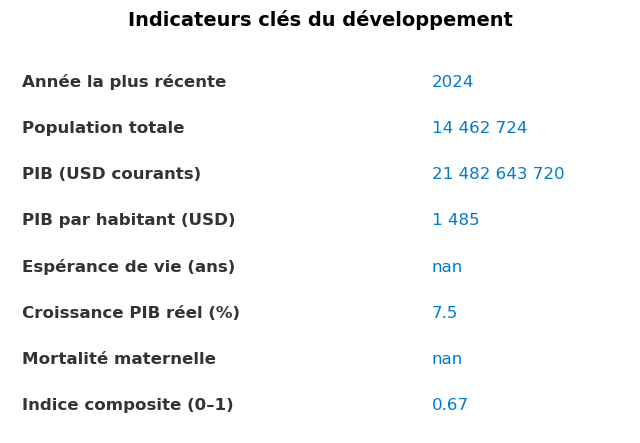

Figure KPI enregistrée : /Users/davidakpovi/challenge_tache1_ANIP/data/processed/figs_tache3/kpi_overview.png


In [26]:
#5
# Figure Matplotlib type
# Objectif :
#   - Présenter les KPI sous forme visuelle, propre et exportable en PNG.

# Dossier d’export des figures
FIGS_DIR = PROCESSED / "figs_tache3"
FIGS_DIR.mkdir(parents=True, exist_ok=True)

# Mise en page “cartes”
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis("off")

title = "Indicateurs clés du développement"
ax.set_title(title, fontsize=14, fontweight="bold", pad=16)

# Paramètres d’affichage
y = 0.9
line_height = 0.12
label_x = 0.02
value_x = 0.68

for item in kpis:
    label = str(item.get("Indicateur", "—"))
    value = str(item.get("Valeur", "—"))
    ax.text(label_x, y, label, fontsize=12, fontweight="bold", color="#333")
    ax.text(value_x, y, value, fontsize=12, color="#007acc")
    y -= line_height

# Enregistrement optionnel
out_png = FIGS_DIR / "kpi_overview.png"
plt.savefig(out_png, dpi=160, bbox_inches="tight")
plt.show()

print("Figure KPI enregistrée :", out_png)


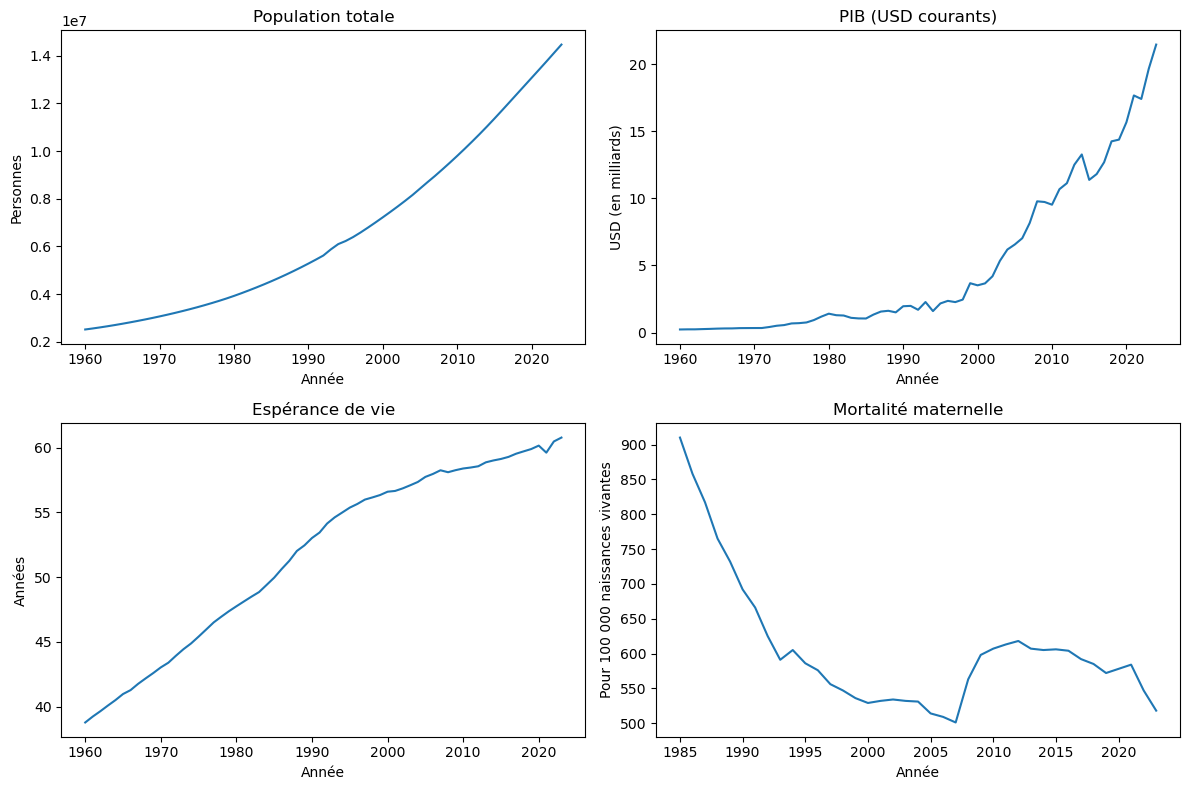

In [27]:
#6
#Visualisation des Tendances
# Objectif :
#   - Illustrer visuellement les grandes tendances historiques des indicateurs clés du développement au Bénin.
#   - Fournir une première base de visualisations exploitables dans un futur tableau de bord Power BI.
# Détails :
#   1. Création d’une figure avec 4 sous-graphiques organisés en grille (2x2).
#   2. Fonction utilitaire `tracer_si_possible()` :
#        • Vérifie la présence des colonnes 'year' et de la variable choisie.
#        • Trie et nettoie les données avant le tracé.
#        • Permet de redimensionner l’échelle (ex. PIB en milliards pour lisibilité).
#   3. Graphiques produits :
#        • Population totale (croissance démographique)
#        • PIB (en USD courants)
#        • Espérance de vie à la naissance
#        • Mortalité maternelle (pour 100 000 naissances vivantes)
# Sorties :
#   - 4 graphiques linéaires affichant les tendances temporelles principales.
#   - Analyse visuelle directe des progrès et défis du pays entre 1960 et 2024.


# Création de 4 graphiques principaux pour les variables clés
fig, axes = plt.subplots(2, 2, figsize=(12,8))

def tracer_si_possible(ax, col, titre, etiquette_y, echelle=None):
    if {"year", col}.issubset(df.columns):
        s = df[["year", col]].dropna().drop_duplicates("year").sort_values("year")
        if not s.empty:
            y = s[col] / echelle if (echelle and echelle>0) else s[col]
            ax.plot(s["year"], y)
            ax.set_title(titre)
            ax.set_xlabel("Année")
            ax.set_ylabel(etiquette_y)

tracer_si_possible(axes[0,0], "population_total", "Population totale", "Personnes")
tracer_si_possible(axes[0,1], "gdp_current_usd", "PIB (USD courants)", "USD (en milliards)", echelle=1e9)
tracer_si_possible(axes[1,0], "life_expectancy_years", "Espérance de vie", "Années")
tracer_si_possible(axes[1,1], "maternal_mortality_ratio", "Mortalité maternelle", "Pour 100 000 naissances vivantes")

plt.tight_layout()
plt.show()


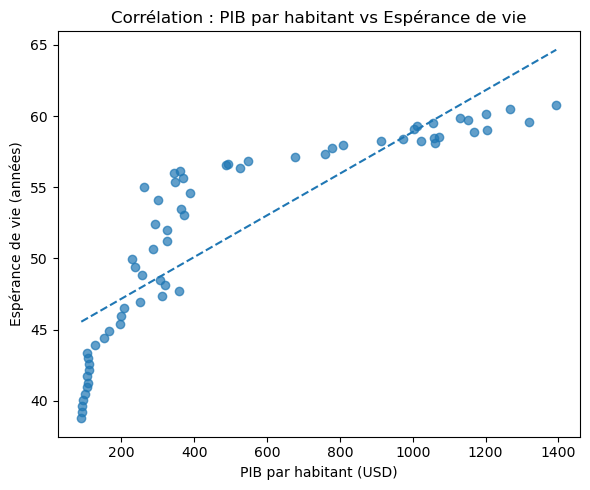

In [28]:
#7
#Corrélation entre économie et santé
# Objectif :
#   - Explorer la relation entre le niveau économique (PIB par habitant)
#     et le bien-être sanitaire (espérance de vie à la naissance).
# Détails :
#   1. Sélection des colonnes pertinentes :
#        • `gdp_per_capita_usd` : indicateur économique.
#        • `life_expectancy_years` : indicateur de santé publique.
#   2. Nettoyage des données : suppression des lignes contenant des valeurs manquantes.
#   3. Création d’un nuage de points illustrant la corrélation entre les deux variables.
#   4. Ajout d’une ligne de tendance linéaire pour visualiser la direction générale de la relation.
# Interprétation attendue :
#   - Une corrélation positive (pente ascendante) traduit que l’amélioration du niveau de vie
#     s’accompagne d’une hausse de l’espérance de vie.
# Sortie :
#   - Graphique de dispersion (scatter plot) montrant la relation entre économie et santé.
#   - Sert de support à la narration "prospérité ↔ longévité" du tableau de bord Power BI.


# Étude de la relation entre le PIB par habitant et l'espérance de vie
xcol, ycol = "gdp_per_capita_usd", "life_expectancy_years"
if {xcol, ycol}.issubset(df.columns):
    valid = df[[xcol, ycol, "year"]].dropna()
    if not valid.empty:
        plt.figure(figsize=(6,5))
        plt.scatter(valid[xcol], valid[ycol], alpha=0.7)
        plt.title("Corrélation : PIB par habitant vs Espérance de vie")
        plt.xlabel("PIB par habitant (USD)")
        plt.ylabel("Espérance de vie (années)")
        # Ligne de tendance linéaire
        z = np.polyfit(valid[xcol], valid[ycol], 1)
        p = np.poly1d(z)
        xs = np.linspace(valid[xcol].min(), valid[xcol].max(), 200)
        plt.plot(xs, p(xs), linestyle="--")
        plt.tight_layout()
        plt.show()


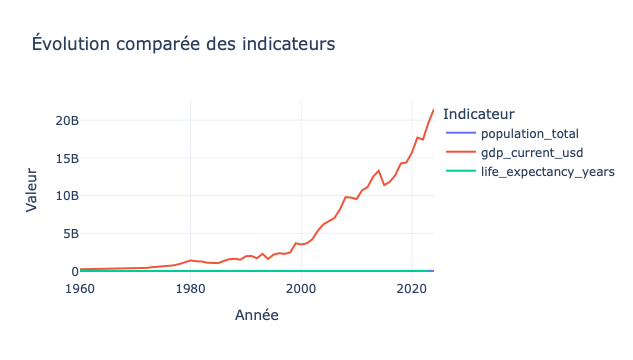

Export (HTML) — Évolution comparée : /Users/davidakpovi/challenge_tache1_ANIP/data/processed/evolution_indicateurs.html


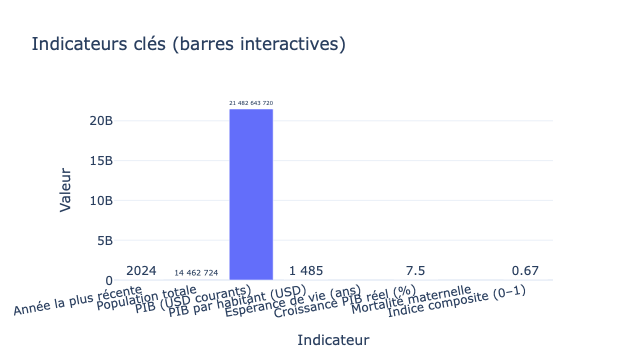

Export (HTML) — KPI interactifs : /Users/davidakpovi/challenge_tache1_ANIP/data/processed/kpi_bar_interactif.html


In [29]:
#8
# Interactifs Plotly : Évolution comparée (lignes) + KPI (barres)
# Objectif :
#   - Visualiser interactivement les grandes tendances temporelles (lignes)
#   - Mettre en avant les KPI les plus récents (barres) et exporter en HTML
# Prérequis :
#   - `df` chargé (avec au moins 'year' + indicateurs)
#   - `kpis` construit (liste de dicts avec "Indicateur" et "Valeur")


# 1) Import/availability Plotly
if 'PLOTLY_AVAILABLE' not in locals():
    try:
        import plotly.express as px
        PLOTLY_AVAILABLE = True
    except Exception:
        PLOTLY_AVAILABLE = False
else:
    # si le flag existe mais px n'est pas importé, on tente
    if PLOTLY_AVAILABLE:
        try:
            import plotly.express as px
        except Exception:
            PLOTLY_AVAILABLE = False

if not PLOTLY_AVAILABLE:
    print("[INFO] Plotly non disponible : installez-le avec `pip install plotly` pour activer les visuels interactifs.")
else:
    # 2) LIGNES INTERACTIVES — Évolution comparée des indicateurs
    colonnes = [c for c in ["population_total", "gdp_current_usd", "life_expectancy_years"] if c in df.columns]
    if {"year"}.issubset(df.columns) and colonnes:
        long = df[["year"] + colonnes].melt(id_vars="year", var_name="Indicateur", value_name="Valeur")
        fig_lines = px.line(
            long, x="year", y="Valeur", color="Indicateur",
            title="Évolution comparée des indicateurs",
            labels={"year": "Année"}
        )
        fig_lines.update_layout(template="plotly_white")
        fig_lines.show()

        # Export HTML (optionnel)
        evo_html = PROCESSED / "evolution_indicateurs.html"
        fig_lines.write_html(str(evo_html), include_plotlyjs="cdn")
        print("Export (HTML) — Évolution comparée :", evo_html)
    else:
        print("[INFO] Colonnes nécessaires manquantes pour l’évolution comparée (attendu : 'year' + au moins un indicateur).")

    # 3) BARRES INTERACTIVES — KPI (à partir de la liste `kpis`)
    if 'kpis' in locals() and isinstance(kpis, list) and len(kpis) > 0:
        import pandas as pd

        df_kpi = pd.DataFrame(kpis)

        # Certaines “Valeur” peuvent être formatées en texte (espaces des milliers) → conversion douce
        def _to_num(s):
            try:
                return float(str(s).replace(" ", ""))
            except:
                return None

        df_kpi["Valeur_num"] = df_kpi["Valeur"].apply(_to_num)

        fig_kpi = px.bar(
            df_kpi, x="Indicateur", y="Valeur_num", text="Valeur",
            title="Indicateurs clés (barres interactives)",
            labels={"Indicateur": "Indicateur", "Valeur_num": "Valeur"}
        )
        fig_kpi.update_traces(textposition="outside")
        fig_kpi.update_layout(template="plotly_white", showlegend=False, xaxis_tickangle=-10)
        fig_kpi.show()

        # Export HTML (optionnel)
        kpi_html = PROCESSED / "kpi_bar_interactif.html"
        fig_kpi.write_html(str(kpi_html), include_plotlyjs="cdn")
        print("Export (HTML) — KPI interactifs :", kpi_html)
    else:
        print("[INFO] KPI non trouvés : assurez-vous que la variable `kpis` est définie avant cette cellule.")


In [30]:
#9
#Interprétation et storytelling

from IPython.display import Markdown, display

histoire = """
### Principaux enseignements

- **Croissance démographique soutenue** : la population du Bénin augmente régulièrement sur la période observée.  
- **Amélioration sanitaire** : l'espérance de vie progresse, signe d'un meilleur accès aux soins et aux conditions de vie.  
- **Défis persistants** : la mortalité maternelle diminue, mais reste un enjeu majeur de santé publique.  
- **Lien entre économie et santé** : la hausse du PIB par habitant est corrélée à une amélioration des indicateurs de bien-être.  
- **Points de vigilance** : certaines fluctuations du PIB réel indiquent des chocs économiques ponctuels nécessitant une analyse approfondie.
"""
display(Markdown(histoire))



### Principaux enseignements

- **Croissance démographique soutenue** : la population du Bénin augmente régulièrement sur la période observée.  
- **Amélioration sanitaire** : l'espérance de vie progresse, signe d'un meilleur accès aux soins et aux conditions de vie.  
- **Défis persistants** : la mortalité maternelle diminue, mais reste un enjeu majeur de santé publique.  
- **Lien entre économie et santé** : la hausse du PIB par habitant est corrélée à une amélioration des indicateurs de bien-être.  
- **Points de vigilance** : certaines fluctuations du PIB réel indiquent des chocs économiques ponctuels nécessitant une analyse approfondie.


In [31]:
#10
# Export des graphiques statiques
# Sauvegarde des graphiques sous forme d’images PNG pour le rapport
# 10) Export des graphiques statiques au format PNG
# Objectif :
#   - Sauvegarder les graphiques principaux sous forme d’images pour une utilisation dans un rapport,
#     une présentation ou un tableau de bord externe (ex : PowerPoint, Word, PDF).
# Détails :
#   1. Crée un dossier dédié : `data/processed/figs_tache3/`.
#   2. La fonction `sauvegarder_graphe()` :
#        • Vérifie la présence des colonnes nécessaires.
#        • Trie les données par année et trace la série temporelle.
#        • Sauvegarde chaque figure en haute résolution (160 dpi).
#   3. Les graphiques produits sont :
#        - `population.png` : évolution de la population totale.
#        - `pib.png` : évolution du PIB (USD courants).
#        - `esperance_vie.png` : évolution de l’espérance de vie.
#        - `mortalite_maternelle.png` : évolution du taux de mortalité maternelle.
# Sorties :
#   - 4 fichiers PNG enregistrés dans le dossier `figs_tache3/`.
#   - Message de confirmation affichant le chemin d’enregistrement.

FIGS_DIR = PROCESSED / "figs_tache3"
FIGS_DIR.mkdir(parents=True, exist_ok=True)

def sauvegarder_graphe(col, titre, etiquette_y, nom_fichier, echelle=None):
    if {"year", col}.issubset(df.columns):
        s = df[["year", col]].dropna().drop_duplicates("year").sort_values("year")
        if not s.empty:
            plt.figure(figsize=(7,4))
            y = s[col] / echelle if (echelle and echelle>0) else s[col]
            plt.plot(s["year"], y)
            plt.title(titre)
            plt.xlabel("Année")
            plt.ylabel(etiquette_y)
            plt.tight_layout()
            plt.savefig(FIGS_DIR / nom_fichier, dpi=160)
            plt.close()

# Enregistrement des principales figures
sauvegarder_graphe("population_total", "Population totale", "Personnes", "population.png")
sauvegarder_graphe("gdp_current_usd", "PIB (USD courants)", "USD", "pib.png")
sauvegarder_graphe("life_expectancy_years", "Espérance de vie", "Années", "esperance_vie.png")
sauvegarder_graphe("maternal_mortality_ratio", "Mortalité maternelle", "Pour 100 000 naissances vivantes", "mortalite_maternelle.png")

print("Images enregistrées dans :", FIGS_DIR)


Images enregistrées dans : /Users/davidakpovi/challenge_tache1_ANIP/data/processed/figs_tache3
